<a href="https://colab.research.google.com/github/yfzhoucs/VLN-R2R/blob/main/VLN_visual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import numpy as np
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms, utils
import cv2
from google.colab.patches import cv2_imshow
from collections import defaultdict

In [3]:
from google.colab import drive
drive.mount('/gdrive')
os_path = "/gdrive/My Drive/Colab Storage/MMML VLN/"

Mounted at /gdrive


In [4]:
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [8]:
# !python2 download_mp.py -o . --type matterport_skybox_images

In [6]:
!mkdir v1
!mkdir v1/scans
!mkdir v1_unzip

In [7]:
import os
from os import listdir
from os.path import isfile, join
scans = [f for f in listdir(os_path + "v1/scans")]
# move data from drive to local
# for ct, scan in enumerate(scans):
#   print(ct, scan)
#   file_on_drive = os_path+"v1/scans/"+scan+'/matterport_skybox_images.zip'
#   dir_name = "v1/scans/"+scan
#   os.system("mkdir "+dir_name)
#   os.system('cp "' + file_on_drive + '" "' + dir_name +'"')

#unzip directly from drive to local
for ct, scan in enumerate(scans):
  print(ct, scan)
  file_on_drive = os_path+"v1/scans/"+scan+'/matterport_skybox_images.zip'
  os.system('unzip "'+file_on_drive+'" -d v1_unzip/')



0 17DRP5sb8fy
1 1LXtFkjw3qL
2 1pXnuDYAj8r
3 29hnd4uzFmX
4 2azQ1b91cZZ
5 2n8kARJN3HM
6 2t7WUuJeko7
7 5LpN3gDmAk7
8 5q7pvUzZiYa
9 5ZKStnWn8Zo
10 759xd9YjKW5
11 7y3sRwLe3Va
12 8194nk5LbLH
13 82sE5b5pLXE
14 8WUmhLawc2A
15 aayBHfsNo7d
16 ac26ZMwG7aT
17 ARNzJeq3xxb
18 B6ByNegPMKs
19 b8cTxDM8gDG
20 cV4RVeZvu5T
21 D7G3Y4RVNrH
22 D7N2EKCX4Sj
23 dhjEzFoUFzH
24 E9uDoFAP3SH
25 e9zR4mvMWw7
26 EDJbREhghzL
27 EU6Fwq7SyZv
28 fzynW3qQPVF
29 GdvgFV5R1Z5
30 gTV8FGcVJC9
31 gxdoqLR6rwA
32 gYvKGZ5eRqb
33 gZ6f7yhEvPG
34 HxpKQynjfin
35 i5noydFURQK
36 JeFG25nYj2p
37 JF19kD82Mey
38 jh4fc5c5qoQ
39 JmbYfDe2QKZ
40 jtcxE69GiFV
41 kEZ7cmS4wCh
42 mJXqzFtmKg4
43 oLBMNvg9in8
44 p5wJjkQkbXX
45 pa4otMbVnkk
46 pLe4wQe7qrG
47 Pm6F8kyY3z2
48 pRbA3pwrgk9
49 PuKPg4mmafe
50 PX4nDJXEHrG
51 q9vSo1VnCiC
52 qoiz87JEwZ2
53 QUCTc6BB5sX
54 r1Q1Z4BcV1o
55 r47D5H71a5s
56 rPc6DW4iMge
57 RPmz2sHmrrY
58 rqfALeAoiTq
59 s8pcmisQ38h
60 S9hNv5qa7GM
61 sKLMLpTHeUy
62 SN83YJsR3w2
63 sT4fr6TAbpF
64 TbHJrupSAjP
65 ULsKaCPVFJR
66 uNb9QFRL6hY
67 ur

In [8]:
import json
with open('R2R_train.json') as f:
    R2R = json.load(f)
    print(R2R[0])
    print(len(R2R))


path_id_to_pano_id = {}
for item in R2R:
  path_id = item["path_id"]
  path = item['path']
  path_id_to_pano_id[path_id] = path

{'distance': 11.66, 'scan': 'VLzqgDo317F', 'path_id': 6250, 'path': ['af3af33b0120469c9a00daa0d0b36799', '5be145994f974347850a48cecd04cdcd', '79aedad1206b4eea9c4b639ea2182eb7', '1c91ed40af2246f2b126dd0f661970df', '385019f5d018430fa233d483b253076c', 'fd263d778b534f798d0e1ae48886e5f3'], 'heading': 3.751, 'instructions': ['Walk down one flight of stairs and stop on the landing. ', 'Walk between the columns and make a sharp turn right. Walk down the steps and stop on the landing. ', 'walk forward then turn right at the stairs then go down the stairs. ']}
4675


In [9]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import spacy
nltk.download('punkt')
pos_tagger = spacy.load("en_core_web_sm")
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
def clean_text(input_str):
  input_str = input_str.lower()
  input_str = input_str.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))).replace(' '*4, ' ').replace(' '*3, ' ').replace(' '*2, ' ').strip()
  tokens = input_str.split(" ")
  return [ps.stem(item) for item in tokens if len(ps.stem(item))>=2]

In [24]:
# prepare coco data
clean_coco = {}
for ct, cat in enumerate(coco_names):
  if cat in ["N/A", "__background__"]:
    continue
  result = clean_text(cat)
  if len(result) > 1:
    continue
  clean_coco[result[0]] = ct
clean_coco[ps.stem("television")] = coco_names.index("tv")
clean_coco[ps.stem("bike")] = coco_names.index("bicycle")
clean_coco[ps.stem("fridge")] = coco_names.index("refrigerator")
clean_coco[ps.stem("table")] = coco_names.index("dining table")
clean_coco[ps.stem("phone")] = coco_names.index("cell phone")


  

In [12]:
# clean_coco

In [35]:
image_to_labels = {}
for ct, item in enumerate(R2R):
  if ct % 100 == 0: print(ct)

  found_cat = []
  for instr in item['instructions']:

    # get last sentence by spliting on . ,
    last_sent = instr.strip().split(".")[-2].strip().strip(',').split(",")[-1]

    # avoid this case: "Arrive at the top step. . "
    if len(last_sent) <=0:
       last_sent = instr.strip().split(".")[-3].strip().strip(',').split(",")[-1]
    assert(len(last_sent) > 0)

    # find the last sub instruction by split on conjuntion or "then"
    pos = pos_tagger(last_sent)
    found_sub = False
    for idx in reversed(range(len(pos) - 3)): #-3 because we don't want "wait there"
      if pos[idx].pos_ == "CCONJ" or pos[idx].pos_ == "then":
        found_sub = True
        break
    if found_sub:
      temp = [pos[i].text for i in range(idx + 1, len(pos))]
      last_sent = " ".join(temp)
      # print("#"+str(ct)+"new split found "+ last_sent)

    tokens = clean_text(last_sent)

    for token in tokens:
      if token in clean_coco and clean_coco[token] not in found_cat:
        found_cat.append(clean_coco[token])
          
  if found_cat:
    print("#"+str(ct)+", found cat:"+str(coco_names[found_cat[0]]), (item["scan"],item["path_id"], item["path"][-1]))
    image_to_labels[(item["scan"],item["path_id"], item["path"][-1])] = found_cat
  
        
        

0
#1, found cat:dining table ('sT4fr6TAbpF', 3414, 'c06aae190b804b759496db0b88fe4820')
#2, found cat:refrigerator ('8WUmhLawc2A', 48, '1b48df86b7a149fa8e90161265def866')
#3, found cat:chair ('p5wJjkQkbXX', 2513, '7913c846ee9443daafb87cab26566963')
#9, found cat:bed ('Uxmj2M2itWa', 6526, '3ba76deab6be444c8b21652763d82795')
#10, found cat:couch ('EDJbREhghzL', 6907, '181111f8575a49039444d6180bf71c10')
#12, found cat:chair ('2n8kARJN3HM', 2539, '5b4f88b00af3413eb8a3706a62a761e1')
#15, found cat:dining table ('ur6pFq6Qu1A', 6119, '8cad92a787594649a7887ce3c3c22d5b')
#22, found cat:chair ('ZMojNkEp431', 4386, '6855b783e2f34c7981b90ddb5de81bd7')
#24, found cat:dining table ('rPc6DW4iMge', 4820, '1b584863928f47c68978bca62781228b')
#27, found cat:chair ('r47D5H71a5s', 5837, 'e4a808c94c004bc7b2e3101c316bb02c')
#28, found cat:toilet ('ur6pFq6Qu1A', 1095, 'a4755f88913d48a885da112031e73536')
#29, found cat:chair ('qoiz87JEwZ2', 211, '69cbdf9fd3b64552b57887b813845cfa')
#33, found cat:sink ('b8cTxDM8

In [14]:
transform = transforms.Compose([
        # transforms.RandomSizedCrop(224),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        
        # transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                      std=[0.229, 0.224, 0.225])
    ])

In [15]:
X_filenames = []
y_cat = []
for key in image_to_labels.keys():
  one_group = []
  scan, path_id, end_pano_id = key
  for number in range(1, 4+1):
    file_name = "v1_unzip/"+ str(scan) + "/matterport_skybox_images/" + str(end_pano_id) + "_skybox"+str(number)+"_sami.jpg"
    one_group.append(file_name)
  X_filenames.append(one_group)
  y_cat.append(image_to_labels[key])

print(len(X_filenames), len(y_cat))


1802 1802


In [16]:
batch_size = 5

In [17]:
total_correct = 0

start = 0
model.eval()


while start < len(X_filenames):
  true_batch_size = min(start + batch_size, len(X_filenames)) - start
  inputs = []
  true_labels = []
  for group_id in range(start, start + true_batch_size):
    one_group = X_filenames[group_id]
    for number, file_name in enumerate(one_group):
      image = Image.open(file_name)
      inputs.append(transform(image).unsqueeze(0))
    true_labels.append(y_cat[group_id])
  start = start + true_batch_size
  # print(inputs)
  inputs = torch.cat(inputs, dim=0)
  # print(inputs.shape)

  with torch.no_grad():
    inputs = inputs.to(device)
    outputs = model(inputs)
    # print(outputs)
    # get all the predicited class names

    for i in range(true_batch_size):
      found = False
      for j in range(4): #4 because 4 images per pano_id
        id = i*4+j
        pred_labels = outputs[id]['labels'].cpu().numpy()
        pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]

        # get score for all the predicted objects
        pred_scores = outputs[id]['scores'].detach().cpu().numpy()

        # get all the predicted bounding boxes
        pred_bboxes = outputs[id]['boxes'].detach().cpu().numpy()
        pred_bboxes_size = (pred_bboxes[:,2] -  pred_bboxes[:,0]) * (pred_bboxes[:,3] -  pred_bboxes[:,1])

        # get boxes above the threshold score
        boxes = pred_bboxes[pred_scores >= 0.1].astype(np.int32)
        
        confident_labels = pred_labels[np.logical_and(pred_scores >= 0.5, pred_bboxes_size>=20000)]
        # print(confident_labels, true_labels)
        for cat in true_labels[i]:
          if cat in confident_labels:
            found = True
      if found:
          total_correct += 1
    
    print("total evaluated: "+ str(start) + ", running acc:" + str(total_correct / start))

print("acc:" + str(total_correct / len(X_filenames)))

    



/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


total evaluated: 5, running acc:1.0
total evaluated: 10, running acc:0.8
total evaluated: 15, running acc:0.8
total evaluated: 20, running acc:0.8
total evaluated: 25, running acc:0.84
total evaluated: 30, running acc:0.8666666666666667
total evaluated: 35, running acc:0.8857142857142857
total evaluated: 40, running acc:0.85
total evaluated: 45, running acc:0.8222222222222222
total evaluated: 50, running acc:0.8
total evaluated: 55, running acc:0.8181818181818182
total evaluated: 60, running acc:0.7833333333333333
total evaluated: 65, running acc:0.8
total evaluated: 70, running acc:0.8
total evaluated: 75, running acc:0.7866666666666666
total evaluated: 80, running acc:0.7875
total evaluated: 85, running acc:0.7764705882352941
total evaluated: 90, running acc:0.7777777777777778
total evaluated: 95, running acc:0.7684210526315789
total evaluated: 100, running acc:0.78
total evaluated: 105, running acc:0.7714285714285715
total evaluated: 110, running acc:0.7727272727272727
total evaluat

In [40]:
print(X_filenames[0], coco_names[y_cat[0][0]])

['v1/scans/sT4fr6TAbpF/c06aae190b804b759496db0b88fe4820_skybox1_sami.jpg', 'v1/scans/sT4fr6TAbpF/c06aae190b804b759496db0b88fe4820_skybox2_sami.jpg', 'v1/scans/sT4fr6TAbpF/c06aae190b804b759496db0b88fe4820_skybox3_sami.jpg', 'v1/scans/sT4fr6TAbpF/c06aae190b804b759496db0b88fe4820_skybox4_sami.jpg'] dining table


In [36]:
X_filenames = []
y_cat = []
for key in image_to_labels.keys():
  one_group = []
  scan, path_id, end_pano_id = key
  for pano_id in path_id_to_pano_id[path_id]: 
    if pano_id == end_pano_id:
      continue
    for number in range(1, 4+1):
      file_name = "v1_unzip/"+ str(scan) + "/matterport_skybox_images/" + str(pano_id) + "_skybox"+str(number)+"_sami.jpg"
      one_group.append(file_name)

  X_filenames.append(one_group)
  y_cat.append(image_to_labels[key])

print(len(X_filenames),len(y_cat))

1800 1800


In [37]:
batch_size = 1
total_correct = 0

start = 0
model.eval()


while start < len(X_filenames):
  true_batch_size = min(start + batch_size, len(X_filenames)) - start
  inputs = [] #PIL Image 
  true_labels = [] # lables that should not appear for each group
  group_size = [] # group size for each group
  for group_id in range(start, start + true_batch_size):
    one_group = X_filenames[group_id]
    for number, file_name in enumerate(one_group):
      image = Image.open(file_name)
      inputs.append(transform(image).unsqueeze(0))
    true_labels.append(y_cat[group_id])
    group_size.append(len(one_group))

  start = start + true_batch_size
  # print(inputs)
  inputs = torch.cat(inputs, dim=0)
  # print(inputs.shape)

  with torch.no_grad():
    inputs = inputs.to(device)
    outputs = model(inputs)
    # print(outputs)
    # get all the predicited class names

    for i in range(true_batch_size):
      print()
      found = False
      for j in range(group_size[i]): #4 because 4 images per end_pano_id
        id = sum(group_size[:i])+j
        pred_labels = outputs[id]['labels'].cpu().numpy()
        pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]

        # get score for all the predicted objects
        pred_scores = outputs[id]['scores'].detach().cpu().numpy()

        # get all the predicted bounding boxes
        pred_bboxes = outputs[id]['boxes'].detach().cpu().numpy()
        pred_bboxes_size = (pred_bboxes[:,2] -  pred_bboxes[:,0]) * (pred_bboxes[:,3] -  pred_bboxes[:,1])
        # get boxes above the threshold score
        boxes = pred_bboxes[pred_scores >= 0.1].astype(np.int32)
        
        confident_labels = pred_labels[np.logical_and(pred_scores >= 0.5, pred_bboxes_size>=20000)]
        print(confident_labels, true_labels)
        for cat in true_labels[i]:
          if cat in confident_labels:
            found = True
      if not found:
          total_correct += 1
    
    print("total evaluated: "+ str(start) + ", running acc:" + str(total_correct / start))

print("acc:" + str(total_correct / len(X_filenames)))


[] [[67, 62]]
[64] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[] [[67, 62]]
[64] [[67, 62]]
[62 62] [[67, 62]]
[79] [[67, 62]]
[64] [[67, 62]]
[15 62 67] [[67, 62]]
[62 62] [[67, 62]]
[62] [[67, 62]]
[64] [[67, 62]]
[65] [[67, 62]]
total evaluated: 1, running acc:0.0

[79] [[82, 67, 15]]
[] [[82, 67, 15]]
[] [[82, 67, 15]]
[] [[82, 67, 15]]
[79 62 63] [[82, 67, 15]]
[79 79] [[82, 67, 15]]
[] [[82, 67, 15]]
[] [[82, 67, 15]]
[79 79 79] [[82, 67, 15]]
[73] [[82, 67, 15]]
[79 63 63 67 77] [[82, 67, 15]]
[79 82 79 79] [[82, 67, 15]]
[79] [[82, 67, 15]]
[79 79 79 79 79 79] [[82, 67, 15]]
[67] [[82, 67, 15]]
[82 67 67] [[82, 67, 15]]
[79 79 79] [[82, 67, 15]]
[63 67] [[82, 67, 15]]
[82 67 67] [[82, 67, 15]]
[79 33] [[82, 67, 15]]
[81] [[82, 67, 15]]
[63 65] [[82, 67, 15]]
[67 67] [[82, 67, 15]]
[82 82] [[82, 67, 15]]
total evaluated: 2, running acc:0.0

[] [[62]]
[64] [[62]]
[65 15 62] [[62]]
[62 62] [[62]]
[67]

KeyboardInterrupt: ignored

In [42]:
X_filenames[5]
# coco_names[62]
# list(image_to_labels.keys())[5]

['v1_unzip/2n8kARJN3HM/matterport_skybox_images/3611ca6eb11f4a32a7cd3c073862860d_skybox1_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/3611ca6eb11f4a32a7cd3c073862860d_skybox2_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/3611ca6eb11f4a32a7cd3c073862860d_skybox3_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/3611ca6eb11f4a32a7cd3c073862860d_skybox4_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/b2d31a869b644c738697a237d4e724b5_skybox1_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/b2d31a869b644c738697a237d4e724b5_skybox2_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/b2d31a869b644c738697a237d4e724b5_skybox3_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/b2d31a869b644c738697a237d4e724b5_skybox4_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/3d6c224493aa4b8fa5fd16e7ae8e2d66_skybox1_sami.jpg',
 'v1_unzip/2n8kARJN3HM/matterport_skybox_images/3d6c224493aa4b8fa5fd16e7ae8e2d66_skybox2_sami.jpg',


In [28]:
def draw_boxes(boxes, classes, labels, image):
    # read the image with OpenCV
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv2.rectangle(
            image,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, 2
        )
        cv2.putText(image, classes[i], (int(box[0]), int(box[1]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, 
                    lineType=cv2.LINE_AA)
    return image

In [47]:
# image = Image.open("/content/v1_unzip/5LpN3gDmAk7/matterport_skybox_images/ab91de30c3174076814e98ad102a4ec6_skybox3_sami.jpg")
# image = Image.open("/content/v1_unzip/2n8kARJN3HM/matterport_skybox_images/3611ca6eb11f4a32a7cd3c073862860d_skybox4_sami.jpg")
image = Image.open("/content/v1_unzip/2n8kARJN3HM/matterport_skybox_images/5b4f88b00af3413eb8a3706a62a761e1_skybox4_sami.jpg")

model.eval()
with torch.no_grad():
  inputs = transform(image).to(device)
  inputs = inputs.unsqueeze(0)
  outputs = model(inputs)
  print(outputs)
  labels = outputs[0]['labels'].cpu().numpy()
  pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]

  # get score for all the predicted objects
  pred_scores = outputs[0]['scores'].detach().cpu().numpy()

  # get all the predicted bounding boxes
  pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()
  pred_bboxes_size = (pred_bboxes[:,2] -  pred_bboxes[:,0]) * (pred_bboxes[:,3] -  pred_bboxes[:,1])
  # get boxes above the threshold score
  boxes = pred_bboxes[np.logical_and(pred_scores >= 0.5, pred_bboxes_size>=20000)].astype(np.int32)

[{'boxes': tensor([[5.3810e+02, 6.0332e+02, 7.6651e+02, 8.4029e+02],
        [3.6854e+02, 7.7248e+02, 7.1005e+02, 1.0198e+03],
        [8.2888e+02, 4.7140e+02, 9.4430e+02, 5.9036e+02],
        [9.4258e+01, 5.7893e+02, 2.9298e+02, 8.0255e+02],
        [4.1116e+02, 3.1485e+02, 4.8677e+02, 4.0873e+02],
        [1.1354e+02, 5.0989e+02, 1.7300e+02, 5.8793e+02],
        [3.5525e+02, 5.5873e+02, 5.5157e+02, 7.2947e+02],
        [2.1359e+00, 6.8894e+02, 1.2493e+02, 8.2238e+02],
        [7.5331e+02, 6.2260e+02, 1.0016e+03, 8.5099e+02],
        [8.5934e+02, 5.0528e+02, 9.1332e+02, 5.5072e+02],
        [4.9505e+02, 7.3088e+02, 7.5307e+02, 9.8897e+02],
        [2.1835e+00, 6.8945e+02, 1.3106e+02, 8.5318e+02],
        [7.7019e+02, 5.2515e+02, 9.4930e+02, 8.4519e+02],
        [5.9856e+01, 5.8007e+02, 2.8827e+02, 8.0518e+02],
        [8.4974e+02, 5.7513e+02, 9.4076e+02, 6.6556e+02],
        [8.2531e+02, 4.6960e+02, 9.4915e+02, 5.9373e+02],
        [5.5826e+02, 5.9815e+02, 7.2963e+02, 7.4113e+02],
   

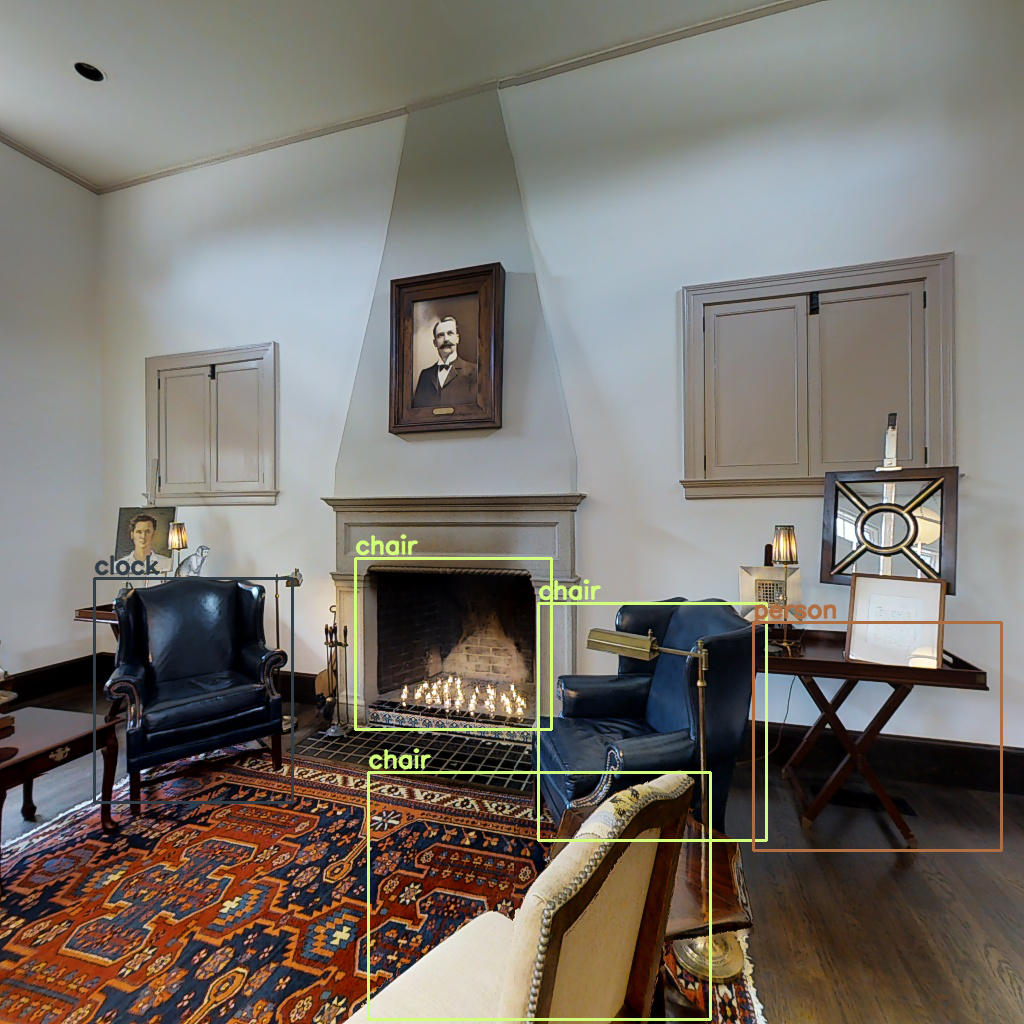

In [48]:
output_image = draw_boxes(boxes, pred_classes, labels, image)
cv2_imshow(output_image)

In [39]:
coco_names[62]

'chair'